<a href="https://colab.research.google.com/github/taketaka-MU/hs-2023/blob/main/20230807/find_min_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 放物線の最小値や最大値を探す

### $y=x^2$ の最小値を左側 ($x=-1$) から探す

傾き$\ge 0$  になったら終了

In [1]:
def fn(x):
  return x*x

dx=0.1 # dx > 0
x1=-1.0
while(x1 < 1.0):
  x2=x1+dx # x1 < x2
  dy=fn(x2) - fn(x1) # 傾き
  if(dy<0):
    x1=x2
  else:
    break
  print("x=%f, y=%f, dy=%f" % (x1,fn(x1),dy))

print("x=%f, y=%f" % (x1,fn(x1)))

x=-0.900000, y=0.810000, dy=-0.190000
x=-0.800000, y=0.640000, dy=-0.170000
x=-0.700000, y=0.490000, dy=-0.150000
x=-0.600000, y=0.360000, dy=-0.130000
x=-0.500000, y=0.250000, dy=-0.110000
x=-0.400000, y=0.160000, dy=-0.090000
x=-0.300000, y=0.090000, dy=-0.070000
x=-0.200000, y=0.040000, dy=-0.050000
x=-0.100000, y=0.010000, dy=-0.030000
x=-0.000000, y=0.000000, dy=-0.010000
x=-0.000000, y=0.000000


### 両側から探せるプログラムを作る

傾きの符号が反転したら終了

In [12]:
def fn(x):
  return x*x

dx=0.01 # dx > 0
x1=0.3
dy1=0
while(x1 > -1.0 and x1 < 1.0):
  x2=x1+dx # x1 < x2
  dy=fn(x2) - fn(x1) # 傾き
  if(dy*dy1 < 0):
    break
  if(dy>0):
    x1=x1-dx
  elif(dy<0):
    x1=x2
  dy1 = dy # 前回の傾き
  print("x=%f, y=%f, dy=%f" % (x1,fn(x1),dy))

print("x=%f, y=%f" % (x1,fn(x1)))

x=0.290000, y=0.084100, dy=0.006100
x=0.280000, y=0.078400, dy=0.005900
x=0.270000, y=0.072900, dy=0.005700
x=0.260000, y=0.067600, dy=0.005500
x=0.250000, y=0.062500, dy=0.005300
x=0.240000, y=0.057600, dy=0.005100
x=0.230000, y=0.052900, dy=0.004900
x=0.220000, y=0.048400, dy=0.004700
x=0.210000, y=0.044100, dy=0.004500
x=0.200000, y=0.040000, dy=0.004300
x=0.190000, y=0.036100, dy=0.004100
x=0.180000, y=0.032400, dy=0.003900
x=0.170000, y=0.028900, dy=0.003700
x=0.160000, y=0.025600, dy=0.003500
x=0.150000, y=0.022500, dy=0.003300
x=0.140000, y=0.019600, dy=0.003100
x=0.130000, y=0.016900, dy=0.002900
x=0.120000, y=0.014400, dy=0.002700
x=0.110000, y=0.012100, dy=0.002500
x=0.100000, y=0.010000, dy=0.002300
x=0.090000, y=0.008100, dy=0.002100
x=0.080000, y=0.006400, dy=0.001900
x=0.070000, y=0.004900, dy=0.001700
x=0.060000, y=0.003600, dy=0.001500
x=0.050000, y=0.002500, dy=0.001300
x=0.040000, y=0.001600, dy=0.001100
x=0.030000, y=0.000900, dy=0.000900
x=0.020000, y=0.000400, dy=0

###大谷選手のホームランの軌道から最高到達地点（$y$ の最大値）を求める

最初から軌道のデータをたどって、傾きが負になったら終了

x=90.671689m, y=24.081366m


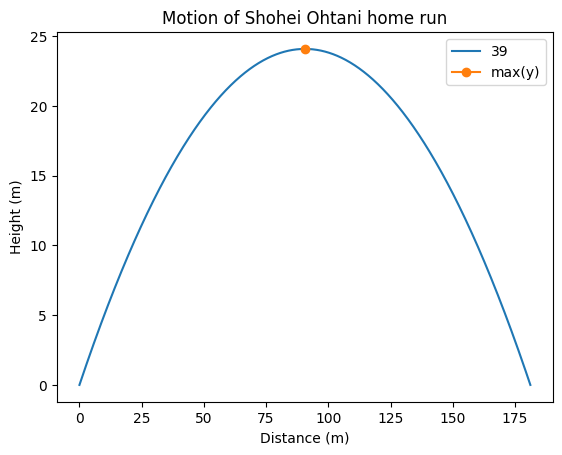

In [17]:
import numpy as np
import matplotlib.pyplot as plt

angle = np.radians(28.0) # 角度 (radian)
speed = 46.3 # 初速 (m/s)
hit_distance = 128 # 到達距離 (m)
g = 9.81  # 重力加速度 m/s^2
t_flight = 2 * speed * np.sin(angle) / g # 滞空時間
t = np.linspace(0, t_flight, num=1000)
x = speed * np.cos(angle) * t
y = speed * np.sin(angle) * t - 0.5 * g * t ** 2

for i in range(len(x)-1): # 軌道のデータを左から順番にたどる
  x1=x[i]
  x2=x[i+1]
  dy=y[i+1] - y[i] # 傾き
  if(dy<0):
    break
print("x=%fm, y=%fm" % (x[i],y[i]))

plt.plot(x, y,label="39")
plt.plot(x[i], y[i], marker='o', label="max(y)")
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Motion of Shohei Ohtani home run')
plt.legend()
plt.show()